# NLP Clothing Reviews Lab

In [13]:
import nltk
import docx2txt
import textblob
from nltk.tokenize import word_tokenize
from nltk.text import Text
import pandas as pd
from textblob import TextBlob

In [14]:
#nltk.download()

In [15]:
# get data
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [16]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [18]:
# standardise columns
# drop useless columns
# eliminate nulls in data I need
# possibly eliminate stopwords
# visualise data to understand
# if negative, look at key words
# use reviews to validate model

In [19]:
# potentially using groupby - sentiment score by division and department
# max, min and mean scores

### Drop Null Values

In [20]:
# Drop NAs
df.dropna(subset=['Review Text', 'Rating', 'Division Name', 'Department Name'], inplace = True)
# Reset index
df.reset_index(drop=True, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22628 entries, 0 to 22627
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               22628 non-null  int64 
 1   Clothing ID              22628 non-null  int64 
 2   Age                      22628 non-null  int64 
 3   Title                    19662 non-null  object
 4   Review Text              22628 non-null  object
 5   Rating                   22628 non-null  int64 
 6   Recommended IND          22628 non-null  int64 
 7   Positive Feedback Count  22628 non-null  int64 
 8   Division Name            22628 non-null  object
 9   Department Name          22628 non-null  object
 10  Class Name               22628 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.9+ MB


### Drop useless columns

In [22]:
df.drop(['Unnamed: 0', 'Clothing ID', 'Title'], axis = 1, inplace=True)
df

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...
22623,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
22624,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
22625,31,"This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
22626,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


### Get ratings according to department and division

In [23]:
rating_by_division = df.groupby(['Division Name']).agg({'Rating':'mean'})
rating_by_division

,Rating
Division Name,
General,4.165282
General Petite,4.196631
Initmates,4.275596


In [24]:
rating_by_department = df.groupby(['Department Name']).agg({'Rating':'mean'})
rating_by_department

,Rating
Department Name,
Bottoms,4.278809
Dresses,4.138812
Intimate,4.271022
Jackets,4.254491
Tops,4.157743
Trend,3.838983


In [25]:
rated_dep_df = rating_by_department.sort_values(by="Rating")

([<matplotlib.axis.XTick at 0x22723bbec70>,
 [Text(0, 0, 'Trend'),
  Text(1, 0, 'Dresses'),
  Text(2, 0, 'Tops'),
  Text(3, 0, 'Jackets'),
  Text(4, 0, 'Intimate'),
  Text(5, 0, 'Bottoms')])

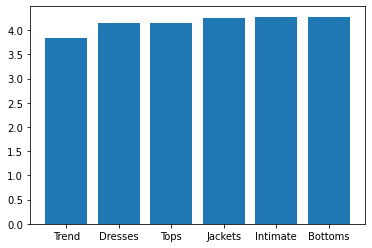

In [26]:
# Visualize
import matplotlib.pyplot as plt
import numpy as np

# get names of departments
departments = rated_dep_df.index.to_list()

# get ratings
rating = rated_dep_df['Rating']

# assign column names
y_pos = np.arange(len(departments))

# Create bars
plt.bar(y_pos, rating)

# Create names on the x-axis
plt.xticks(y_pos, departments)

<AxesSubplot:ylabel='Department Name'>

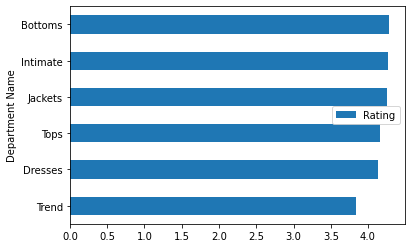

In [27]:
rated_dep_df.plot.barh( y='Rating')

### Get sentiment score

In [28]:
# Get sentiment score annd write to column 
df['sentiment'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.sentiment

0        0.633333
1        0.339583
2        0.073675
3        0.550000
4        0.512891
           ...   
22623    0.552667
22624    0.091667
22625    0.414286
22626    0.322222
22627    0.413889
Name: sentiment, Length: 22628, dtype: float64

### Spot check

In [29]:
check = df.iloc[5]
check

Age                                                                       49
Review Text                I love tracy reese dresses, but this one is no...
Rating                                                                     2
Recommended IND                                                            0
Positive Feedback Count                                                    4
Division Name                                                        General
Department Name                                                      Dresses
Class Name                                                           Dresses
sentiment                                                            0.17875
Name: 5, dtype: object

In [30]:
# Check for three examples
check_text = [df.iloc[5, 1], df.iloc[100, 1], df.iloc[500, 1]]
for text in check_text:
    print(text,'\n')
    print(TextBlob(text).sentiment, '\n')

I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress. 

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125) 

The fabric felt cheap and i didn't find it to be a flattering top. for reference i am wearing a medium in the photos and my measurements are 38-30-40. 

Sentiment(polarity=0.45, subjectivity=0.6) 

I first saw this jacket hanging at the store and it didn't look very cute. i saw it again on sale so i decided to try it on. i'm so glad i did! the inside gray material is so soft. i have broad shoulders and this jacket did not hinder my arms at 

Note: the sentiments appear to be significantly off in some cases

### Break the text into sentences

In [31]:
text = df.iloc[5, 1]
TextBlob(text).sentences

[Sentence("I love tracy reese dresses, but this one is not for the very petite."),
 Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."),
 Sentence("this dress was very pretty out of the package but its a lot of dress."),
 Sentence("the skirt is long and very full so it overwhelmed my small frame."),
 Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."),
 Sentence("i love the color and the idea of the style but it just did not work on me."),
 Sentence("i returned this dress.")]

### Minimum and average sentiments

In [32]:
# Get MINIMUM according to division and department
sent_by_division_min = df.groupby(['Division Name']).agg({'sentiment':'min'})
sent_by_department_min = df.groupby(['Department Name']).agg({'sentiment':'min'})
sent_by_department_min

,sentiment
Department Name,
Bottoms,-0.533333
Dresses,-0.916667
Intimate,-0.575000
Jackets,-0.750000
Tops,-0.975000
Trend,-0.270833


In [33]:
# Get AVERAGE according to department
sent_by_division_avg = df.groupby(['Division Name']).agg({'sentiment':'mean'})
sent_by_department_avg = df.groupby(['Department Name']).agg({'sentiment':'mean'})
sent_by_department_avg

,sentiment
Department Name,
Bottoms,0.250298
Dresses,0.249977
Intimate,0.254581
Jackets,0.238888
Tops,0.250411
Trend,0.202415


### Visualize sentiment

In [37]:
sent_by_dep_min_sorted = sent_by_department_min.sort_values(by='sentiment')
sent_by_dep_min_sorted

,sentiment
Department Name,
Tops,-0.975000
Dresses,-0.916667
Jackets,-0.750000
Intimate,-0.575000
Bottoms,-0.533333
Trend,-0.270833


In [38]:
sent_by_dep_avg_sorted = sent_by_department_avg.sort_values(by='sentiment')
sent_by_dep_avg_sorted

,sentiment
Department Name,
Trend,0.202415
Jackets,0.238888
Dresses,0.249977
Bottoms,0.250298
Tops,0.250411
Intimate,0.254581


<AxesSubplot:ylabel='Department Name'>

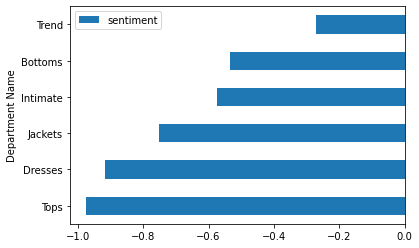

In [39]:
# Visualize MINIMUM sentiment by department
sent_by_dep_min_sorted.plot.barh( y='sentiment')

<AxesSubplot:ylabel='Department Name'>

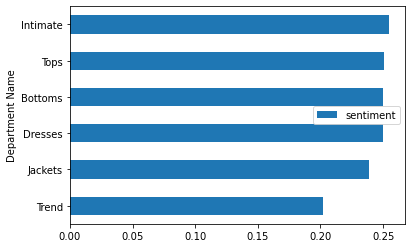

In [40]:
# Visualize AVERAGE sentiment according to department
sent_by_dep_avg_sorted.plot.barh( y='sentiment')

### Stretch

#### How accurate is the sentiment polarity calculated for this dataset? How can you tell?
The best way to estimate the accuracy of the sentiment polarity is to compare the sentiment analysis result to the user's rating of the product and whether the user recommended it. One could also create a ML prediction model to see how accurately the sentiment analysis can be used to predict user ratings or product recommendations

#### what are the most useful ways to visualise the sentiment polarity against the other data in the reviews data set?
It could be useful to visualize the data in Tableau using scatter plots.

#### investigate whether processing / cleaning the review text might lead to a more accurate sentiment calculation

In [44]:
from nltk.text import Text
from nltk.tokenize import word_tokenize

In [42]:
# Check for three examples
check_text = [df.iloc[5, 1], df.iloc[100, 1], df.iloc[500, 1]]
for text in check_text:
    print(text,'\n')
    print(TextBlob(text).sentiment, '\n')

I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress. 

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125) 

The fabric felt cheap and i didn't find it to be a flattering top. for reference i am wearing a medium in the photos and my measurements are 38-30-40. 

Sentiment(polarity=0.45, subjectivity=0.6) 

I first saw this jacket hanging at the store and it didn't look very cute. i saw it again on sale so i decided to try it on. i'm so glad i did! the inside gray material is so soft. i have broad shoulders and this jacket did not hinder my arms at 

In [68]:
# make lowercase
samples_lower = [x.lower() for x in check_text]

In [69]:
test_str = samples_lower[0]
test_str

'i love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.'

In [70]:
from nltk.corpus import stopwords
stop_w = stopwords.words('english')
stop_w

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

#### Remove stop words from text

In [92]:
stop_w_min = [' ' + x + ' ' for x in stop_w]

In [96]:
clean_text = test_str
for word in stop_w_min:
    clean_text = clean_text.replace(word, ' ')
clean_text

'i love tracy reese dresses, one petite. 5 feet tall usually wear 0p brand. dress pretty package lot dress. skirt long full overwhelmed small frame. stranger alterations, shortening narrowing skirt would take away embellishment garment. love color idea style work me. returned dress.'

In [94]:
sample_sent = TextBlob(clean_text).sentiment
sample_sent

Sentiment(polarity=0.15, subjectivity=0.5428571428571428)

In [97]:
clean_text = samples_lower[1]
for word in stop_w_min:
    clean_text = clean_text.replace(word, ' ')
clean_text

'the fabric felt cheap find flattering top. reference wearing medium photos measurements 38-30-40.'

In [98]:
sample_sent = TextBlob(clean_text).sentiment
sample_sent

Sentiment(polarity=0.45, subjectivity=0.6)

Note: hard to tell if removinng stopwords positively impacts accuracy of sentiment analysis. In one example above it seems to be the case, in the other not.